# Star Stellar Classification ML Project

In astronomy, stellar classification is the classification of stars based on their spectral characteristics. The classification scheme of galaxies, quasars, and stars is one of the most fundamental in astronomy. The early cataloguing of stars and their distribution in the sky has led to the understanding that they make up our own galaxy and, following the distinction that Andromeda was a separate galaxy to our own, numerous galaxies began to be surveyed as more powerful telescopes were built. This datasat aims to classify stars, galaxies, and quasars based on their spectral characteristics.

#Content
The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS

alpha = Right Ascension angle (at J2000 epoch)

delta = Declination angle (at J2000 epoch)

u = Ultraviolet filter in the photometric system

g = Green filter in the photometric system

r = Red filter in the photometric system

i = Near Infrared filter in the photometric system

z = Infrared filter in the photometric system

run_ID = Run Number used to identify the specific scan

rereun_ID = Rerun Number to specify how the image was processed

cam_col = Camera column to identify the scanline within the run

field_ID = Field number to identify each field

spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that
2 different observations with the same spec_obj_ID must share the output class)

class = object class (galaxy, star or quasar object)

redshift = redshift value based on the increase in wavelength

plate = plate ID, identifies each plate in SDSS

MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken

fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation


# Details related to this project

In this project, I predict the class of star with various ML algorithms such as SVM Classifier, Navie Bayes Classifier, Decision Tree Classifier, Random Forest Classifier, and XGboost Classifier. The data is downloaded from (https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17?resource=download&select=star_classification.csv).

The following steps are taken in this work:


1. Downloading this dataset from Kaggle
2. Understanding the dataset, formulating the problem and describing the objective
3. Performing a exploratory data analysis, gathering insights, creating a training, & test split and finally preparing the data for modeling.
4. Training & evaluating the different machine learning models.
5. Comparing their performances.
6. Reporting the final performance of best model and showing sample predictions.
7. Hyperparameter tuning on best performing model to further improve accuracy.

At last, summary of the work and links to references.

In [ ]:
!pip install opendatasets scikit-learn

# Installing required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.express as ex
sns.set_style('whitegrid')
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

SMALL_SIZE = 10
MEDIUM_SIZE = 12

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rcParams['figure.dpi']=150

# Downloading and exploring data

In [ ]:
dataset_url1 = 'https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17?resource=download&select=star_classification.csv'

In [ ]:
import opendatasets as od
od.download(dataset_url1)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kusum811
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17


100%|██████████| 6.89M/6.89M [00:00<00:00, 9.37MB/s]


In [ ]:
raw_df = pd.read_csv('stellar-classification-dataset-sdss17/star_classification.csv')
raw_df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
raw_df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


Column "class" is our target and it can have three values, thus, multiclass classification problem. We should get rid of columns containing ID and "plate" column, but lets just analysis further before making this decision.

# Data Cleaning, Preprocessing and Visualisation

We need to take care of min value of features u, g, and z as they seems like skewed enteries

In [ ]:
raw_df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
print(raw_df['u'].skew()) #to check the skewness of feature u
raw_df['u'].describe()

-313.84924237751426


count    100000.000000
mean         21.980468
std          31.769291
min       -9999.000000
25%          20.352353
50%          22.179135
75%          23.687440
max          32.781390
Name: u, dtype: float64

Observe that data in feature 'u' is very much skewed, So, let us fix that by replacing outliers by median of the feature.

In [ ]:
raw_df['u'] = np.where(raw_df['u'] <-100.0, raw_df['u'].median(), raw_df['u'])
print(raw_df['u'].skew())

-0.07029981160936516


In [ ]:
print(raw_df['g'].skew())

-314.2766945750886


In [ ]:
print(raw_df['z'].skew())

-314.759418791375


Observe that the data in features 'g' and 'z' are very skewed.  Let us fix this issue, by replacing outliers with median.

In [ ]:
raw_df['g'] = np.where(raw_df['g'] <-100.0, raw_df['g'].median(),raw_df['g'])
print(raw_df['g'].skew())
raw_df['z'] = np.where(raw_df['z'] <-100.0, raw_df['z'].median(),raw_df['z'])
print(raw_df['z'].skew())

-0.42804583518265465
-0.2568270345085339


In [ ]:
raw_df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,22.080680,20.631588,19.645762,19.084854,18.768990,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,2.251057,2.037374,1.854760,1.757895,1.765973,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,10.996230,10.498200,9.822070,9.469903,9.612333,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352430,18.965245,18.135828,17.732285,17.460900,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179138,21.099882,20.125290,19.405145,19.004598,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [ ]:
raw_df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
raw_df['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

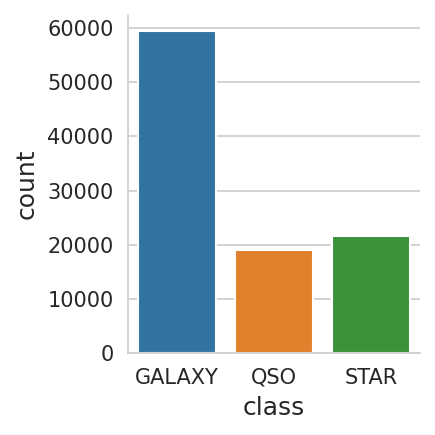

In [ ]:
sns.catplot(x = 'class', kind = 'count', data = raw_df,height=3)

In [ ]:
ex.pie(raw_df,names='class',title='Proportion of different classes')

The data looks a little imbalanced, but for now lets just consider this and lets trains some models.

In [ ]:
raw_df.columns.values

array(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class',
       'redshift', 'plate', 'MJD', 'fiber_ID'], dtype=object)

In [ ]:
#raw_df["class"]=[0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in raw_df["class"]]

In [ ]:
raw_df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
# Correlation of other features with redshift

# Drop the 'class' feature
df_excluded_class = raw_df.drop(columns=['class'])

# Calculate the correlation matrix
corr_matrix = df_excluded_class.corr()

# Extract and sort the correlation values for 'redshift'
corr_redshift = corr_matrix["redshift"].sort_values(ascending=False)

# Display the sorted correlation values
print(corr_redshift)

<ipython-input-169-d19ba94232b0>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



redshift       1.000000
z              0.501058
i              0.492383
r              0.433241
spec_obj_ID    0.388642
plate          0.388641
MJD            0.387109
g              0.318907
u              0.166815
fiber_ID       0.127044
obj_ID         0.065400
run_ID         0.065400
delta          0.031638
alpha          0.001667
cam_col        0.000097
field_ID      -0.021331
rerun_ID            NaN
Name: redshift, dtype: float64

Correlation of 'rerun_ID', 'cam_col', and 'field_ID' with 'redshift' is minimal. So, we choose to drop these columns

In [ ]:
raw_df.drop(['rerun_ID', 'cam_col', 'field_ID'], axis=1, inplace=True)

In [ ]:
raw_df.head(10)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,2.751763e+18,STAR,-0.000008,2444,54082,232


<ipython-input-172-9f9687bf4706>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-172-9f9687bf4706>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-172-9f9687bf4706>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

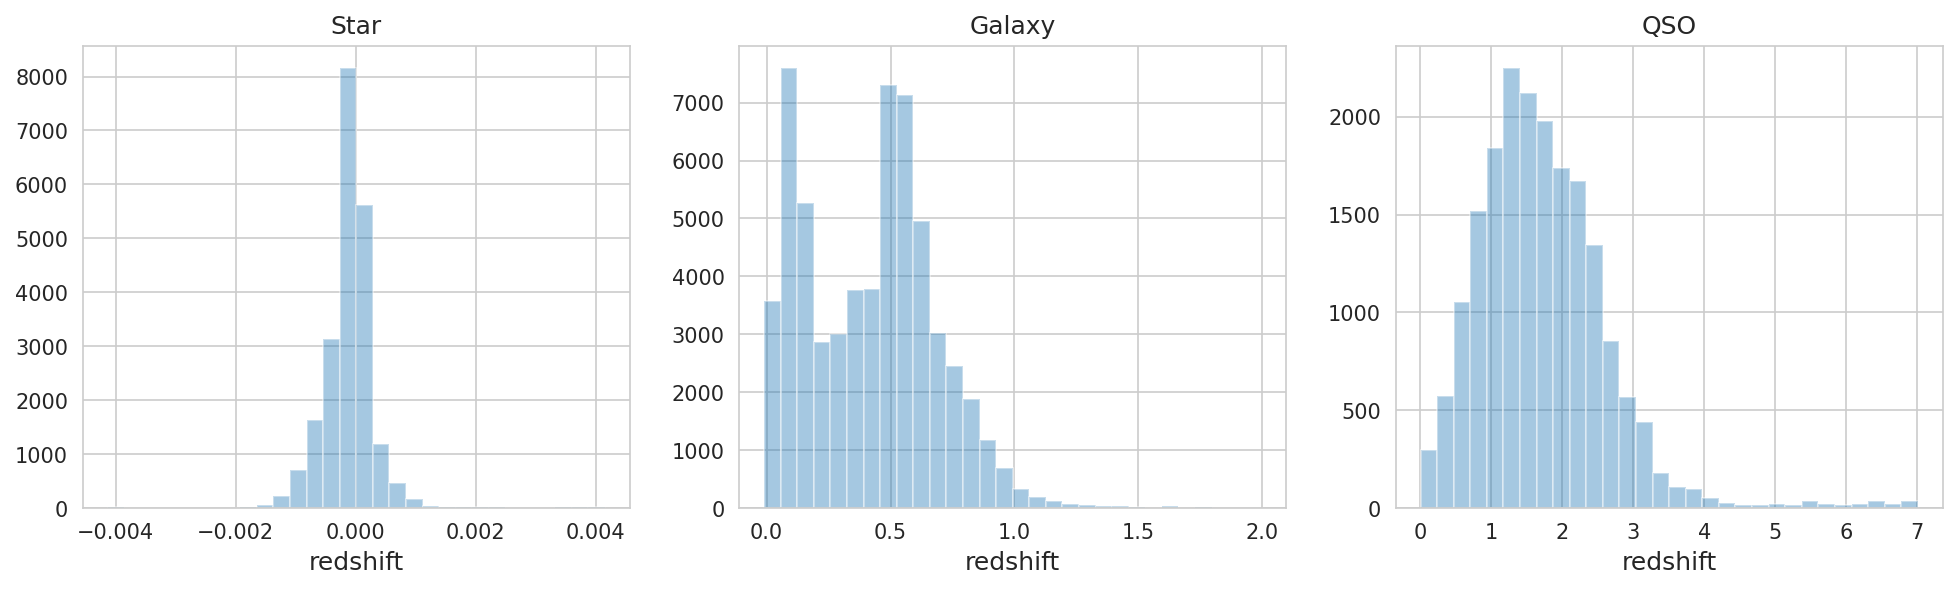

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
ax = sns.distplot(raw_df[raw_df['class']=='STAR'].redshift, bins = 30, ax = axes[0], kde = False)
ax.set_title('Star')
ax = sns.distplot(raw_df[raw_df['class']=='GALAXY'].redshift, bins = 30, ax = axes[1], kde = False)
ax.set_title('Galaxy')
ax = sns.distplot(raw_df[raw_df['class']=='QSO'].redshift, bins = 30, ax = axes[2], kde = False)
ax = ax.set_title('QSO')

<ipython-input-173-ea4440c7ec91>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



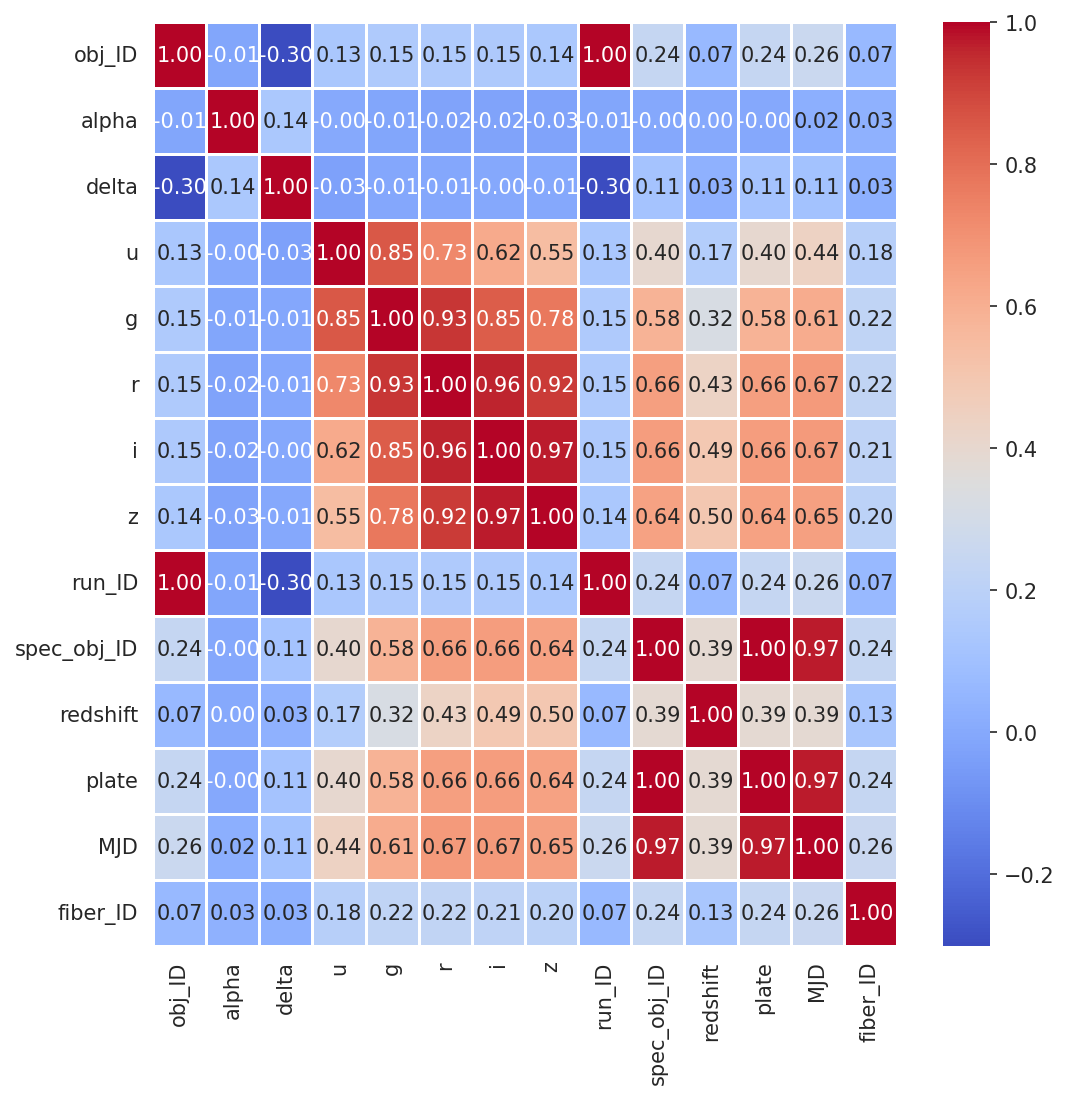

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(raw_df.corr(),annot=True,linewidths=0.6,fmt=".2f",cmap="coolwarm")
plt.show()

Observe that obj_ID and run_ID correlation is 1, spec_obj_ID and plate correlation is 1, spec_obj_ID and MJD correlation is almost 1, and correlation of MJD and plate is almost 1. So, we can drop run_ID, spec_obj_ID and plate.

Also, see that correlation of alpha is almost 0 with all other features.

Note that the "MJD" feature represents Modified Julian Date.



In [ ]:
# Correlation of other features with redshift
corr = raw_df.corr()
corr["redshift"].sort_values(ascending=False)

<ipython-input-174-81decda37844>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



redshift       1.000000
z              0.501058
i              0.492383
r              0.433241
spec_obj_ID    0.388642
plate          0.388641
MJD            0.387109
g              0.318907
u              0.166815
fiber_ID       0.127044
obj_ID         0.065400
run_ID         0.065400
delta          0.031638
alpha          0.001667
Name: redshift, dtype: float64

In [ ]:
raw_df.drop(['run_ID', 'spec_obj_ID', 'plate', 'alpha'], axis=1, inplace=True)

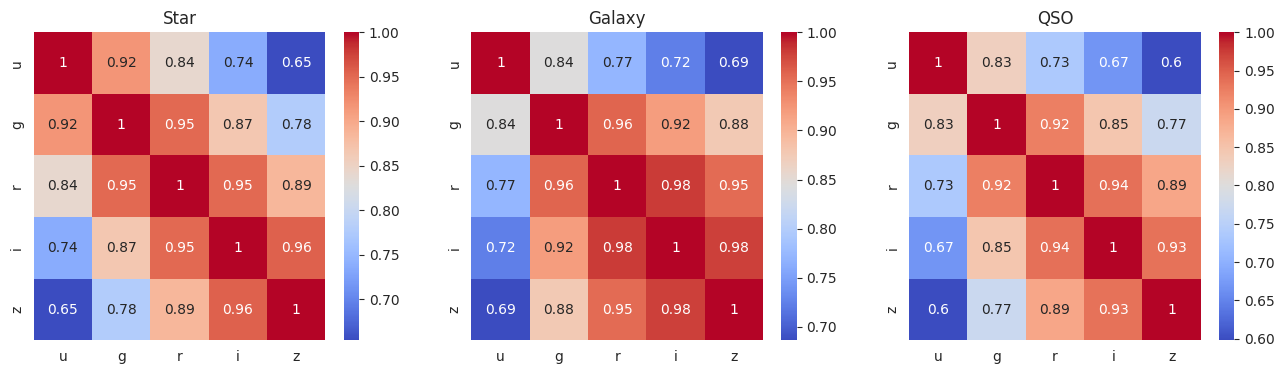

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(raw_df[raw_df['class']=='STAR'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[0], cmap='coolwarm',annot=True)
ax.set_title('Star')
ax = sns.heatmap(raw_df[raw_df['class']=='GALAXY'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[1], cmap='coolwarm',annot=True)
ax.set_title('Galaxy')
ax = sns.heatmap(raw_df[raw_df['class']=='QSO'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[2], cmap='coolwarm',annot=True)
ax = ax.set_title('QSO')

In [ ]:
updated_df = raw_df

# Numeric feature scaling, encoding of categorical column and data splitting

In [ ]:
scaler = MinMaxScaler()
sdss = scaler.fit_transform(updated_df.drop('class', axis=1))

In [ ]:
# encoding class labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(updated_df['class'])
updated_df['class'] = y_encoded

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(updated_df.drop('class', axis=1), updated_df['class'], test_size=0.25)

# K-nearest neighbour model training and prediction on test set

In [ ]:
knn = KNeighborsClassifier()
training_start = time.perf_counter()
knn.fit(X_train, y_train)
training_end = time.perf_counter()
pred_train = knn.predict(X_train)
acc_knn_train = (pred_train == y_train).sum().astype(float) / len(pred_train)*100
print("K-Nearest Neighbors Classifier's prediction accuracy on training set is: %3.2f" % (acc_knn_train))
prediction_start = time.perf_counter()
preds = knn.predict(X_test)
prediction_end = time.perf_counter()
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
knn_train_time = training_end-training_start
knn_prediction_time = prediction_end-prediction_start
print("K-Nearest Neighbors Classifier's prediction accuracy on test set is: %3.2f" % (acc_knn))
print("Time consumed for training: %4.3f seconds" % (knn_train_time))
print("Time consumed for prediction: %4.3f seconds" % (knn_prediction_time))

K-Nearest Neighbors Classifier's prediction accuracy on training set is: 79.13
K-Nearest Neighbors Classifier's prediction accuracy on test set is: 72.40
Time consumed for training: 0.152 seconds
Time consumed for prediction: 1.885 seconds


In [ ]:
knn.score(X_test, y_test)

0.724

# Naive Bayes Model training and prediction on test set

In [ ]:
gnb = GaussianNB()
training_start = time.perf_counter()
gnb.fit(X_train, y_train)
training_end = time.perf_counter()
preds_train = gnb.predict(X_train)
acc_gnb_train = (preds_train == y_train).sum().astype(float) / len(preds_train)*100
print("Gaussian Naive Bayes Classifier's prediction accuracy on training set is: %3.2f" % (acc_gnb_train))
prediction_start = time.perf_counter()
preds = gnb.predict(X_test)
prediction_end = time.perf_counter()
acc_gnb = (preds == y_test).sum().astype(float) / len(preds)*100
gnb_train_time = training_end-training_start
gnb_prediction_time = prediction_end-prediction_start
print("Gaussian Naive Bayes Classifier's prediction accuracy on testing set is: %3.2f" % (acc_gnb))
print("Time consumed for training: %4.3f seconds" % (gnb_train_time))
print("Time consumed for prediction: %4.3f seconds" % (gnb_prediction_time))

Gaussian Naive Bayes Classifier's prediction accuracy on training set is: 59.25
Gaussian Naive Bayes Classifier's prediction accuracy on testing set is: 60.03
Time consumed for training: 0.025 seconds
Time consumed for prediction: 0.006 seconds


In [ ]:
gnb.score(X_test, y_test)

0.60028

# Decision Tree Classifier Model training and prediction on test set

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)
training_start = time.perf_counter()
dtc.fit(X_train, y_train)
training_end = time.perf_counter()
pred_train = dtc.predict(X_train)
acc_dtc_train = (pred_train == y_train).sum().astype(float) / len(pred_train)*100
print("Decision Tree Classifier's prediction accuracy on training set is: %3.2f" % (acc_dtc_train))
prediction_start = time.perf_counter()
preds = dtc.predict(X_test)
prediction_end = time.perf_counter()
acc_dtc = (preds == y_test).sum().astype(float) / len(preds)*100
dtc_train_time = training_end-training_start
dtc_prediction_time = prediction_end-prediction_start
print("Decision Tree Classifier's prediction accuracy on test set is: %3.2f" % (acc_dtc))
print("Time consumed for training: %4.3f seconds" % (dtc_train_time))
print("Time consumed for prediction: %4.3f seconds" % (dtc_prediction_time))

Decision Tree Classifier's prediction accuracy on training set is: 100.00
Decision Tree Classifier's prediction accuracy on test set is: 96.59
Time consumed for training: 1.525 seconds
Time consumed for prediction: 0.007 seconds


In [ ]:
dtc.score(X_test, y_test)

0.96588

# XG Boost Classifier Model training and prediction on test set

In [ ]:
xgb = XGBClassifier(n_estimators=10)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
pred_train = xgb.predict(X_train)
acc_xgb_train = (pred_train == y_train).sum().astype(float) / len(pred_train)*100
print("XGBoost's prediction accuracy on training set is: %3.2f" % (acc_xgb_train))
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()
acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy on testing set is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %4.3f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy on training set is: 97.77
XGBoost's prediction accuracy on testing set is: 97.63
Time consumed for training: 0.441
Time consumed for prediction: 0.019 seconds


In [ ]:
xgb.score(X_test, y_test)

0.97628

As the prediction accuracy for both of the training set and testing set is very good, this implies that our model is not overfitting and thus, our model is giving a good performance overall.

There is no high variance and thus, there is no overfitting issue.

# Random forest classifier Model training and prediction on test set

In [ ]:
rfc = RandomForestClassifier(n_estimators=10)
training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()
pred_train = rfc.predict(X_train)
acc_rfc_train = (pred_train == y_train).sum().astype(float) / len(pred_train)*100
print("Random Forest Classifier's prediction accuracy on training set is: %3.2f" % (acc_rfc_train))
prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()
acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100
rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start
print("Random Forest Classifier's prediction accuracy on test set is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %4.3f seconds" % (rfc_prediction_time))

Random Forest Classifier's prediction accuracy on training set is: 99.74
Random Forest Classifier's prediction accuracy on test set is: 97.78
Time consumed for training: 2.998 seconds
Time consumed for prediction: 0.044 seconds


In [ ]:
rfc.score(X_test, y_test)

0.97776

# Support Vector Machine Classifier Model training and prediction on test set

In [ ]:
svc = SVC()
training_start = time.perf_counter()
svc.fit(X_train, y_train)
training_end = time.perf_counter()
preds_train = svc.predict(X_test)
acc_svc_train = (preds_train == y_test).sum().astype(float) / len(preds_train)*100
print("Support Vector Machine Classifier's prediction accuracy of training set is: %3.2f" % (acc_svc_train))
prediction_start = time.perf_counter()
preds = svc.predict(X_test)
prediction_end = time.perf_counter()
acc_svc = (preds == y_test).sum().astype(float) / len(preds)*100
svc_train_time = training_end-training_start
svc_prediction_time = prediction_end-prediction_start
print("Support Vector Machine Classifier's prediction accuracy of test set is: %3.2f" % (acc_svc))
print("Time consumed for training: %4.3f seconds" % (svc_train_time))
print("Time consumed for prediction: %4.3f seconds" % (svc_prediction_time))

Support Vector Machine Classifier's prediction accuracy of training set is: 60.03
Support Vector Machine Classifier's prediction accuracy of test set is: 60.03
Time consumed for training: 218.412 seconds
Time consumed for prediction: 77.822 seconds


In [ ]:
svc.score(X_test,y_test)

0.60028

# Model Performances Comparison

In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes', 'Decision Tree',
              'XGBoost', 'Random Forest','SVC'],
    'Train Score': [acc_knn_train, acc_gnb_train, acc_dtc_train, acc_xgb_train, acc_rfc_train, acc_svc_train],
    'Test Score': [acc_knn, acc_gnb, acc_dtc, acc_xgb, acc_rfc,acc_svc],
    'Runtime Training': [knn_train_time, gnb_train_time, dtc_train_time, xgb_train_time, rfc_train_time, svc_train_time],
    'Runtime Prediction': [knn_prediction_time, gnb_prediction_time, dtc_prediction_time, xgb_prediction_time, rfc_prediction_time, svc_prediction_time]})

result_df = results.sort_values(by='Test Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Train Score,Test Score,Runtime Training,Runtime Prediction
Model,,,,
Random Forest,99.740000,97.776,2.998345,0.044056
XGBoost,97.766667,97.628,0.441256,0.019080
Decision Tree,100.000000,96.588,1.525361,0.006797
KNN,79.134667,72.400,0.151581,1.884701
Naive Bayes,59.250667,60.028,0.025063,0.006479
SVC,60.028000,60.028,218.412456,77.822269


On comparing, we observe that Decision tree Classifier is one of the fastest and most accurate model.

We now do some hyperparameter tuning of Decision Tree Classifier to further improve its efficiency.

# Hyperparamter Tuning Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

We can compute the accuracy of the model on the training and validation sets using model.score

In [ ]:
model.score(X_train, y_train)

0.95112

In [ ]:
model.score(X_test, y_test)

0.95156

Both the accuracy are 95% now. Lets make this better.

In [ ]:
model.classes_

array([0, 1, 2])

In [ ]:
# plt.figure(figsize=(80,20))
# plot_tree(model, feature_names=X_train.columns, filled=True, rounded=True, class_names=model.classes_);

In [ ]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(X_train, y_train)
model.score(X_test, y_test)

0.97348

In [ ]:
model = DecisionTreeClassifier(max_depth=8, random_state=42).fit(X_train, y_train)
model.score(X_test, y_test)

0.97392

The accuracy of the model for test set has increased by more than 2%.

In [ ]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [ ]:
model.score(X_train, y_train)

0.98108

In [ ]:
model.score(X_test, y_test)

0.97604

In [ ]:
model = DecisionTreeClassifier(max_depth=11,max_leaf_nodes=128, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=128, random_state=42)

In [ ]:
model.score(X_train, y_train)

0.9809066666666667

In [ ]:
model.score(X_test, y_test)

0.97608

Observe that the accuracy of the model has become flat and is no longer getting any better.

In [ ]:
best_model=model

## Saving the best trained model

In [ ]:
import pickle

# Define the filename for the saved model
filename = 'best_model.pkl'

# Use pickle to save the trained model to a file
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model saved to {filename}")

Model saved to best_model.pkl


To load the model back into your environment later, you can use the following code:

In [ ]:
# Use pickle to load the trained model from the file
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully")

Model loaded successfully


# Summary and References

In this project, the Star Class dataset is used which consists of 100000 observations and 18 features. The aim is to classify stars based on various features, total feature (18 features defined). We have performed exploratory data analysis to gather insights, created a training, validation & test dataset and prepared the data for modeling. Then, we trained and evaluated different machine learning models such as k-NN Classifier, Navie Bayes Classifier, Random Forest Classifier and XGboost Classifier.  We have seen that some ML models performs extremly well. Finally, we compared the performance of models are evaluated on a test data.

The best model trained is Decision tree classifier model and done some hyperparameter tuning with an accuracy of 97.6% on test set.





#References

1. The dataset used for this project is obtained from Kaggle and at https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17?resource=download&select=star_classification.csv

2. https://jovian.com/learn/machine-learning-with-python-zero-to-gbms

3. https://jovian.com/kusum-sangwan/python-random-forests-assignment

4. https://www.geeksforgeeks.org/